## Final Project - NLP on Twitter Tweets 

## Run below to get api tweets

In [ ]:
# ## 3/11/2025 7:20 Code, Works!!!
# # have to indidually run this 5 times, 15 mins spaced out with selected category words
# # make sure to change bearer_token
# # change category

# import tweepy
# import pandas as pd
# import re
# import time
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# # Download required nltk resources (if not already downloaded)
# nltk.download("punkt")
# nltk.download("stopwords")
# nltk.download("wordnet")
# ## group tokens

# jesus_token = ""
# will_token = ""
# natalie_token = ""
# # Twitter API credentials – replace with your actual bearer token

# BEARER_TOKEN = r"AAAAAAAAAAAAAAAAAAAAAPOqzwEAAAAApGQPJnn%2B8CN9TuwXEw8EAngc3cw%3Dc787JBYztkat1tFvR70EYQNzTiJMTqzdGFEgGp2YmPah1FHAOw"  # change this !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# client = tweepy.Client(bearer_token=BEARER_TOKEN)

# # Set up stopwords and lemmatizer
# stop_words = set(stopwords.words("english"))
# lemmatizer = WordNetLemmatizer()

# def clean_and_tokenize(tweet_text):
#     """
#     Cleans and tokenizes a tweet:
#       - Removes URLs, mentions, hashtags, numbers, and special characters.
#       - Converts text to lowercase.
#       - Tokenizes, removes stopwords, and lemmatizes.
      
#     Returns:
#       cleaned_text (str): The cleaned tweet as a string.
#       tokenized_list (list): A list of tokens (words).
#     """
#     # Remove URLs, mentions, hashtags, and numbers
#     tweet_text = re.sub(r"http\S+|www\S+|@\w+|#\w+|\d+", "", tweet_text)
#     # Convert to lowercase
#     tweet_text = tweet_text.lower()
#     # Tokenize the tweet
#     tokens = word_tokenize(tweet_text)
#     # Remove non-alphabetic tokens and stopwords, then lemmatize each token
#     tokenized_list = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
#     # Rejoin tokens into a cleaned string
#     cleaned_text = " ".join(tokenized_list)
#     return cleaned_text, tokenized_list

# def fetch_category_tweets(category, wait_time=910): ## 15 min waittime
#     """
#     Pulls 20 English tweets for a given category (excluding retweets), cleans and tokenizes them,
#     and writes the data to a CSV file named `twitter_data_{category}.csv`.
    
#     Args:
#         category (str): The category or keyword to search for.
#         wait_time (int): Seconds to wait after processing (default is 910).
#     """
#     tweet_data = []  # List to store tweets for the category
#     query = f"{category} lang:en -is:retweet"
#     print(f"Fetching tweets for category: {category}")
    
#     # Request 20 tweets matching the query
#     response = client.search_recent_tweets(query=query, max_results=20, tweet_fields=["created_at", "text"])
    
#     if response.data:
#         for tweet in response.data:
#             original_text = tweet.text
#             cleaned_text, tokenized_list = clean_and_tokenize(original_text)
#             tweet_data.append({
#                 "Category": category,
#                 "Created_At": tweet.created_at,
#                 "Original_Tweet": original_text,
#                 "Cleaned_Text": cleaned_text,
#                 "Tokenized_Text": tokenized_list
#             })
#     else:
#         print(f"No tweets found for category: {category}")
    
#     # Create a DataFrame and save to a CSV file
#     df = pd.DataFrame(tweet_data, columns=["Category", "Created_At", "Original_Tweet", "Cleaned_Text", "Tokenized_Text"])
#     csv_filename = f"twitter_data_{category}.csv"
#     df.to_csv(csv_filename, index=False)
#     print(f"✅ Successfully saved tweets for '{category}' to '{csv_filename}'")
    

# # Example usage for a category:

# # Have to wait 15 mins between requests
# # change to specified categories
# fetch_category_tweets("politics")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Fetching tweets for category: politics
✅ Successfully saved tweets for 'politics' to 'twitter_data_politics.csv'


### Exploring the Data

In [11]:
# importing neccessary packages
import pandas as pd
import seaborn as sb
import numpy as np
import pandas as pd

# reading in twitter csv file
twitter_full = pd.read_csv('data/twitter_dataset.csv')

#  looking at first 5 observations and shape of csv
print(twitter_full.shape)
twitter_full.head()

(10000, 6)


,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


We can see the shape of the dataset is 10,000 columns by 6 variables. Those 6 variables are:

- `Tweet_ID` - A unique identifier that maps to a specific observation
- `Username` - The username of the person who tweeted
- `Text` - Contains the text of the tweet
- `Retweets` - Number of retweets
- `Likes` - Number of likes per tweet
- `Timestamp` - The time at which the tweet was posted

In [12]:
print(twitter_full.head())

   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  
3  2023-04-10 22:06:29  
4  2023-01-24 07:12:21  


Let's check for any null values in our training set 

In [13]:
# checks each column too see if null
twitter_full.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

There is no null so lets continue on and begain preparation for tokenization by applying the lower function to each tweets so capitlization is removed. Next we will load vadar and apply it to each row of the dataset to obtain the sentiment score of each tweet.

In [14]:
# make the tweets all in lower case to prep for tokenization
twitter_full['Text'] = twitter_full['Text'].str.lower()

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# nltk.download('vader_lexicon')

# loads in vaders pretrained sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# define function that takes inputted text and returns score of sentiment
def get_sentiment(text):
    # polarity scores using vadar will return pos, nue, neg and compound components
    scores = sentiment_analyzer.polarity_scores(text)
    return scores['compound']  

# apply function above to each row of training set
twitter_full['Sentiment Score'] = twitter_full['Text'].astype(str).apply(get_sentiment)

# checking if sentiments worked
print(twitter_full[['Text', 'Sentiment Score']].head())

                                                Text  Sentiment Score
0  party least receive say or single. prevent pre...           0.8885
1  hotel still congress may member staff. media d...           0.2960
2  nice be her debate industry that year. film wh...           0.8481
3  laugh explain situation career occur serious. ...           0.6249
4  involve sense former often approach government...           0.6705


We have now have gotten the sentiment compound scores which is considered a normalized sentiment score ranging from -1 to 1 (negative to positive). The ranges for the compound sentiment score include:

- Negative: < -0.05 
- Nuetral: between -0.5 and 0.5
- Positive: > 0.05

Let's assign these labels to each sentiment now by creating a new function `get_sentiment_label()`

In [59]:
 # defining new sentiment label function

def get_sentiment_label(score):
    if score > 0.05:
        label = 'Positive'
    elif score < -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'
    return label

twitter_full['Sentiment Label'] = twitter_full['Sentiment Score'].apply(get_sentiment_label)

twitter_full.groupby('Sentiment Label').count()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment Score
Sentiment Label,,,,,,,
Negative,1710,1710,1710,1710,1710,1710,1710
Neutral,389,389,389,389,389,389,389
Positive,7901,7901,7901,7901,7901,7901,7901


For the purposes of our project we do not need the full 10,000 observations. We wish to maintain a 80% / 20% split between training data and testing data. We also wish that they are split evenly between the 3 categories of `Sentiment Label` which include `Nuetral`, `Positive` and `Negative`. To proceed further we will randomize 3,600 observations from the original 10,000 to use and then test our model on the 400 (max limit for API) tweets aquired through the API.


We will instead continue with proportion stratification.

In [60]:
from sklearn.utils import resample

# proportions of orginal datsset based on sentiment 
sentiment_proportions = twitter_full['Sentiment Label'].value_counts(normalize=True)
print(f'Here is the proportions of {sentiment_proportions}') 

# training size we wish for 
train_size = 3600  

# finds the amount of observations needed for each category
sample_sizes = (sentiment_proportions * train_size).astype(int)
print(f'Here are the needed amounts of {sample_sizes}')

# stratified sampling based on proportions of orignial data 
twitter_train = twitter_full.groupby('Sentiment Label', group_keys=False).apply(
    lambda x: resample(x, n_samples=sample_sizes[x.name], random_state=100)
)

# resamples the data in order to achieve randomness
twitter_train = twitter_train.sample(frac=1, random_state=100).reset_index(drop=True)


Here is the proportions of Sentiment Label
Positive    0.7901
Negative    0.1710
Neutral     0.0389
Name: proportion, dtype: float64
Here are the needed amounts of Sentiment Label
Positive    2844
Negative     615
Neutral      140
Name: proportion, dtype: int64


C:\Users\Michael\AppData\Local\Temp\ipykernel_20088\2431233654.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  twitter_train = twitter_full.groupby('Sentiment Label', group_keys=False).apply(


## Exploratory Data Analysis

Posible Visualization Ideas

- Amount of tweets per category (will be proportionally stratified from original dataset) (pie chart or bar)
- Comparison to number of likes and sentiment label (maybe avergaes of both)
- We can do textblob for most common words on each sentiment rating 
- 

- Do we want to do eda on both the traininf or testing set, or purely just the traininf set

    - If we do both we can do side by sides of the same graphics if we want

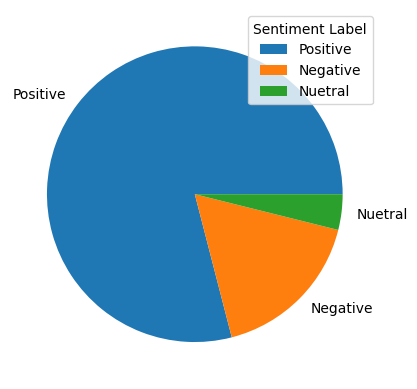

In [61]:
import matplotlib.pyplot as plt
sample_sizes

# pie chart of our distribution 
plt.pie(sample_sizes, labels = ["Positive", 'Negative', 'Nuetral']);
plt.legend(title = 'Sentiment Label', loc = 'upper right');

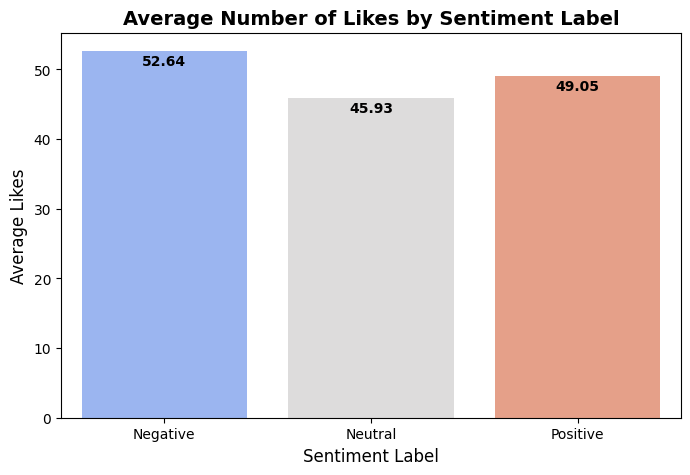

In [62]:
# calculates the average number of likes per label
average_likes = twitter_train.groupby('Sentiment Label')['Likes'].mean().reset_index()


fig, ax = plt.subplots(figsize=(8,5))

avg_like_bplot = sb.barplot(data=average_likes, x='Sentiment Label', y='Likes', hue = 'Sentiment Label',palette="coolwarm");
plt.xticks()
plt.xlabel("Sentiment Label", fontsize=12);
plt.ylabel("Average Likes", fontsize=12);
plt.title("Average Number of Likes by Sentiment Label", fontsize=14, fontweight='bold');

for rect in ax.patches:
    height = rect.get_height() # height of each bar aka mean likes
    ax.text(rect.get_x() + rect.get_width() / 2,  # x position 
            height - (height * 0.01),  # y position 
            f'{height:.2f}', 
            ha='center', va='top', fontsize=10, color='Black', fontweight='bold') 

plt.show()


In [63]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

# already handled puncuation 
# remove puncuation 
twitter_train['Text']= twitter_train['Text'].str.replace(r'[^\w\s]', '', regex=True)

# tokenize each review 
twitter_train['tokenized_text'] = twitter_train['Text'].apply(
    lambda x: word_tokenize(x) if isinstance(x, str) else [])

stop_words = set(stopwords.words('english'))

def no_stop_words(tokens):
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return []
    
twitter_train['clean_text'] = twitter_train['tokenized_text'].apply(no_stop_words)


twitter_train.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment Score,Sentiment Label,tokenized_text,clean_text
0,8989,iedwards,same various plant environment meeting know yo...,15,35,2023-04-05 07:48:30,-0.4404,Negative,"[same, various, plant, environment, meeting, k...","[various, plant, environment, meeting, know, r..."
1,9571,murraydonald,within agency sport memory\npage no tonight pa...,14,68,2023-03-06 02:12:53,0.2500,Positive,"[within, agency, sport, memory, page, no, toni...","[within, agency, sport, memory, page, tonight,..."
2,4272,nburton,however operation some most top protect statio...,95,29,2023-01-22 12:32:14,-0.2798,Negative,"[however, operation, some, most, top, protect,...","[however, operation, top, protect, station, tr..."
3,4936,acarson,over it improve hit maintain increase expert d...,51,30,2023-02-03 13:27:33,0.6369,Positive,"[over, it, improve, hit, maintain, increase, e...","[improve, hit, maintain, increase, expert, dev..."
4,508,jeffreyhuynh,write spring into machine set trip report stor...,11,81,2023-05-08 17:47:49,0.2023,Positive,"[write, spring, into, machine, set, trip, repo...","[write, spring, machine, set, trip, report, st..."


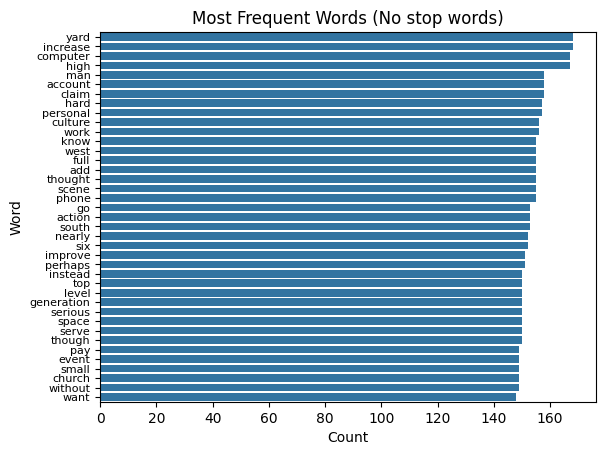

In [64]:
freq = {}

## all types of reviews
for tweet in twitter_train['clean_text']:
    if isinstance(tweet, list):
        for word in tweet:
            if word not in freq:
                freq[word] = 1
            else:
                freq[word] += 1 



sorted_review_df = pd.DataFrame(sorted(freq.items(), key=lambda item: item[1], reverse=True),
                                columns=['Word', 'Count'])

sb.barplot(sorted_review_df[1:40], x="Count", y="Word")
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Most Frequent Words (No stop words)")
plt.yticks(fontsize = 8)
plt.show()

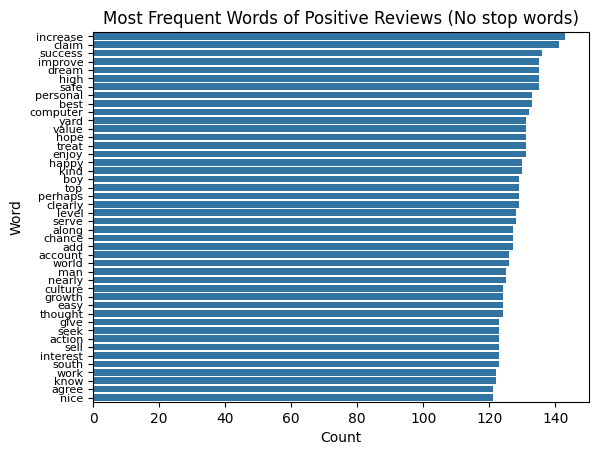

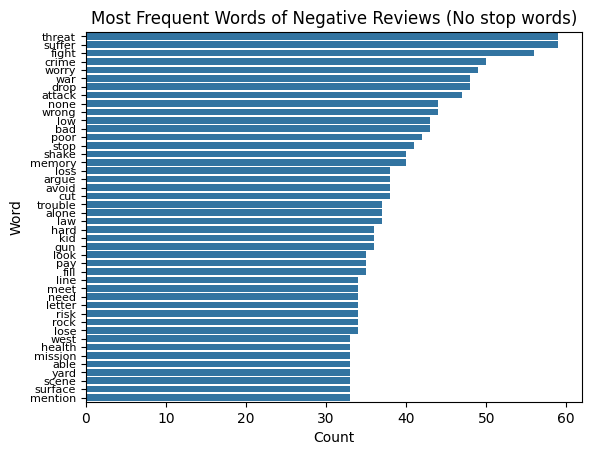

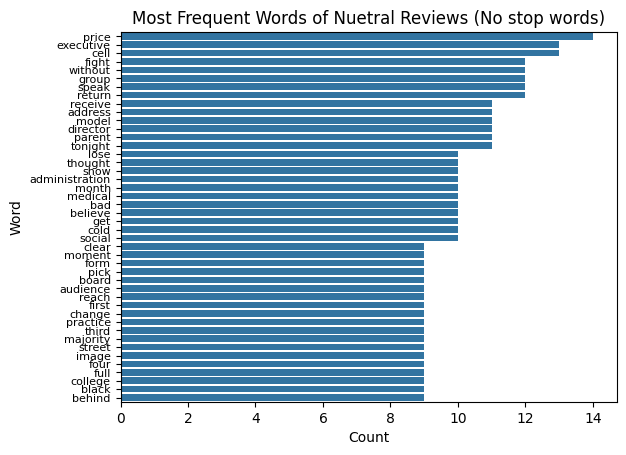

In [65]:
# postive reviews / negative reviews / nuetral reviews
pos_freq = {}
neg_freq = {}
nue_freq = {}

for i, row in twitter_train.iterrows():
    text =  row['clean_text']
    if (row['Sentiment Label'] == 'Positive'):
        if isinstance(text, list):
            for word in text:
                if word not in pos_freq:
                    pos_freq[word] = 1
                else:
                    pos_freq[word] += 1 
    elif (row['Sentiment Label'] == 'Negative'):
        if isinstance(text, list):
            for word in text:
                if word not in neg_freq:
                    neg_freq[word] = 1
                else:
                    neg_freq[word] += 1 
    else:
        if isinstance(text, list):
            for word in text:
                if word not in nue_freq:
                    nue_freq[word] = 1
                else:
                    nue_freq[word] += 1 


# positive dataframe
post_review_df = pd.DataFrame(sorted(pos_freq.items(), key = lambda x: x[1], reverse =True), 
                              columns = ['Word', 'Count'])

sb.barplot(post_review_df[:44], x="Count", y="Word")
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Most Frequent Words of Positive Reviews (No stop words)")
plt.yticks(fontsize = 8)
plt.show()

# negative dataframe
neg_review_df = pd.DataFrame(sorted(neg_freq.items(), key=lambda x: x[1], reverse=True),
                                columns=['Word', 'Count'])
                

sb.barplot(neg_review_df[:44], x="Count", y="Word")
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Most Frequent Words of Negative Reviews (No stop words)")
plt.yticks(fontsize = 8)
plt.show()



# Neutral dataframe
neu_review_df = pd.DataFrame(sorted(nue_freq.items(), key=lambda x: x[1], reverse=True),
                                columns=['Word', 'Count'])
                

sb.barplot(neu_review_df[:44], x="Count", y="Word")
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Most Frequent Words of Nuetral Reviews (No stop words)")
plt.yticks(fontsize = 8)
plt.show()

Textblobs

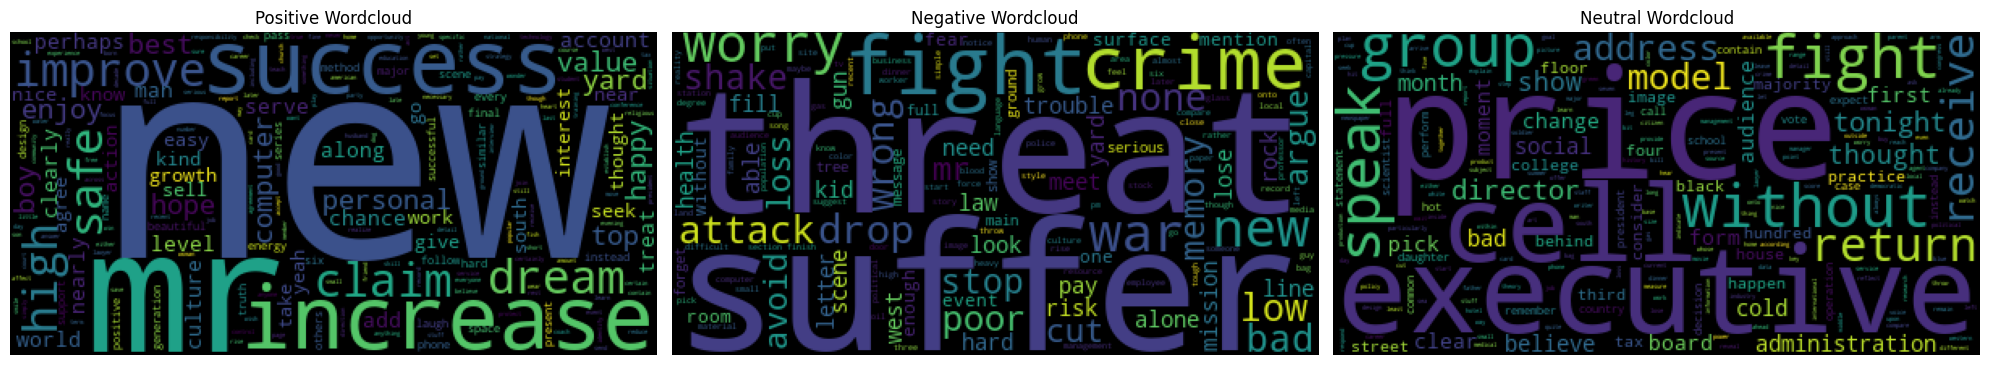

In [66]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_words = []
negative_words = []
nuetral_words = []

for i , row in twitter_train.iterrows():
    if isinstance(row['clean_text'], list):  
        if row['Sentiment Label'] == 'Positive':
            positive_words.extend(row['clean_text'])
        elif row['Sentiment Label'] == 'Negative':
            negative_words.extend(row['clean_text']) 
        else:
            nuetral_words.extend(row['clean_text']) 


positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)
nuetral_text = ' '.join(nuetral_words)


wordcloud_pos = WordCloud().generate(positive_text)
wordcloud_neg = WordCloud().generate(negative_text)
wordcloud_nue = WordCloud().generate(nuetral_text)


# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # 1 row, 3 columns

# Assign each word cloud to a specific axis
axes[0].imshow(wordcloud_pos)
axes[0].set_title('Positive Wordcloud')
axes[0].axis("off")

axes[1].imshow(wordcloud_neg)
axes[1].set_title('Negative Wordcloud')
axes[1].axis("off")

axes[2].imshow(wordcloud_nue)
axes[2].set_title('Neutral Wordcloud')
axes[2].axis("off")

plt.tight_layout()
plt.show()


TD_IDF scores

In [67]:
twitter_train.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,Sentiment Score,Sentiment Label,tokenized_text,clean_text
0,8989,iedwards,same various plant environment meeting know yo...,15,35,2023-04-05 07:48:30,-0.4404,Negative,"[same, various, plant, environment, meeting, k...","[various, plant, environment, meeting, know, r..."
1,9571,murraydonald,within agency sport memory\npage no tonight pa...,14,68,2023-03-06 02:12:53,0.2500,Positive,"[within, agency, sport, memory, page, no, toni...","[within, agency, sport, memory, page, tonight,..."
2,4272,nburton,however operation some most top protect statio...,95,29,2023-01-22 12:32:14,-0.2798,Negative,"[however, operation, some, most, top, protect,...","[however, operation, top, protect, station, tr..."
3,4936,acarson,over it improve hit maintain increase expert d...,51,30,2023-02-03 13:27:33,0.6369,Positive,"[over, it, improve, hit, maintain, increase, e...","[improve, hit, maintain, increase, expert, dev..."
4,508,jeffreyhuynh,write spring into machine set trip report stor...,11,81,2023-05-08 17:47:49,0.2023,Positive,"[write, spring, into, machine, set, trip, repo...","[write, spring, machine, set, trip, report, st..."


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# our cleaned text without stop words (list) into a string
twitter_train["clean_text_nolist"] = twitter_train["clean_text"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")

# create the vector
vectorizer = TfidfVectorizer() 

tfidf_matrix = vectorizer.fit_transform(twitter_train["clean_text_nolist"])  

# change tdif to df
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# finds the mean of each word in df
tfidf_means = tfidf_df.mean().sort_values(ascending=False)

# highest and lowest 30
top_30_words = tfidf_means.head(30)
bottom_30_words = tfidf_means.tail(30)



print("Top 30 Words with Highest TF-IDF Scores:\n", top_30_words)
print("\nBottom 30 Words with Lowest TF-IDF Scores:\n", bottom_30_words)

Top 30 Words with Highest TF-IDF Scores:
 fight         0.007994
computer      0.007885
increase      0.007855
yard          0.007789
high          0.007749
account       0.007573
scene         0.007441
man           0.007432
hard          0.007407
personal      0.007406
claim         0.007399
culture       0.007343
add           0.007325
phone         0.007293
west          0.007288
work          0.007285
action        0.007278
know          0.007274
nearly        0.007254
thought       0.007236
full          0.007224
south         0.007223
church        0.007221
generation    0.007199
level         0.007172
instead       0.007147
small         0.007140
serve         0.007124
go            0.007123
almost        0.007120
dtype: float64

Bottom 30 Words with Lowest TF-IDF Scores:
 sense        0.005270
player       0.005254
bit          0.005253
ago          0.005246
cover        0.005243
difficult    0.005237
mean         0.005220
seven        0.005214
leader       0.005211
hour      

In [69]:
import itertools
from nltk.util import bigrams
from collections import Counter


# bigrams
def get_top_bigrams(text_list, n=30):
    bigram_list = []
    for review in text_list:
        if isinstance(review, list):  
            bigram_list.extend(list(bigrams(review)))
            
    bigram_counts = Counter(bigram_list).most_common(n)

    return bigram_counts     

# top 30 bigrams overall
top_bigrams = get_top_bigrams(twitter_train["clean_text"])

# df for display
bigram_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Count'])
print(bigram_df)


                         Bigram  Count
0          (maintain, increase)      6
1              (tonight, least)      6
2            (something, treat)      6
3              (movement, thus)      6
4              (several, party)      6
5           (head, institution)      6
6           (claim, technology)      6
7          (experience, common)      6
8                 (accept, sea)      6
9                  (miss, kind)      6
10             (practice, long)      6
11          (throughout, three)      6
12  (environmental, television)      6
13        (reflect, particular)      6
14           (member, computer)      5
15               (deep, growth)      5
16                (put, school)      5
17            (whatever, board)      5
18         (democratic, always)      5
19         (last, professional)      5
20              (single, offer)      5
21                  (late, eat)      5
22             (region, recent)      5
23             (spring, manage)      5
24              (part, su

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply to both training and testing data
twitter_train["clean_text_nolist"] = twitter_train["clean_text_nolist"].apply(lemmatize_text)
merge_df["Cleaned_Text"] = merge_df["Cleaned_Text"].apply(lemmatize_text)


What else we can include/need:\

- Need to use vadar package on the testing data (twitter api)

- Train models on traing data (SVM and Other)

- Could include a confusion matric to show corrrectly predicted values against actual values, for each model

- Include Accuracy Metric 

- Any other post hoc visualizations

- Choose Visualizations to include in report (at least 4) / presentation (whatever deemed appropiate)

- Structure of report (3-5 Paragraphs)

    1. Introduction
        
        - Introduce the project and our goal
        - Why sentimeent analus on twitter is usefule (maybe how it can be used for businesses to understand customer feedback on a product or even to understand public opinion)
        - Specify the route of the including two sepearte datasets, one from kaggle and other data will be pulled from api
    
    2. 2nd Paragraph, Datacollection and Preproccessing 

        -
        
    3. Model Training/ Testing 
    4. Concusion / What can be done in teh future that would expalnf this project

    5. 

In [70]:
import pandas as pd
import os

# List of categories
categories = [
    "movies", "games", "music", "sports", "technology", "food", "traveling",
    "weather", "politics", "economy", "education", "art", "culture", "climate",
    "work", "financial", "health", "news", "service", "social media", "coffee", 'beach'
]

# file of data
csv_folder = "data/testing_data"


dfs = []

# goes through each category
for category in categories:
    file_path = f"{csv_folder}/twitter_data_{category}.csv"
    
    # checks file
    if os.path.exists(file_path):
        try:
            # read in csv
            df = pd.read_csv(file_path) 
            df['category'] = category 
            dfs.append(df)  
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
    else:
        print(f"File not found: {file_path}")

# merge into single csv
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)

    # Save merged CSV in the same folder (overwrite if exists)
    merged_file_path = f"{csv_folder}/merged_twitter_data.csv"
    merged_df.to_csv(merged_file_path, index=False)

    print(f"Merged CSV saved successfully at {merged_file_path} (Overwritten if existed)!")
else:
    print("No files found to merge.")


File not found: data/testing_data/twitter_data_food.csv
File not found: data/testing_data/twitter_data_traveling.csv
File not found: data/testing_data/twitter_data_economy.csv
File not found: data/testing_data/twitter_data_financial.csv
File not found: data/testing_data/twitter_data_health.csv
File not found: data/testing_data/twitter_data_news.csv
File not found: data/testing_data/twitter_data_service.csv
File not found: data/testing_data/twitter_data_social media.csv
File not found: data/testing_data/twitter_data_coffee.csv
File not found: data/testing_data/twitter_data_beach.csv
Merged CSV saved successfully at data/testing_data/merged_twitter_data.csv (Overwritten if existed)!


In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# VADER Sentiment Analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    # polarity scores using vadar will return pos, nue, neg and compound components
    scores = sentiment_analyzer.polarity_scores(text)
    return scores['compound']

merged_df['Sentiment Score'] = merged_df['Original_Tweet'].astype(str).apply(get_sentiment)
merged_df['Sentiment Score']

merged_df

,Category,Created_At,Original_Tweet,Cleaned_Text,Tokenized_Text,category,Keyword,Sentiment Score
0,movies,2025-03-12 05:02:25+00:00,@JoshKeatley @lLokioki @krassenstein So fittin...,fitting feel like movie show cartoon warned u ...,"['fitting', 'feel', 'like', 'movie', 'show', '...",movies,NaN,-0.1027
1,movies,2025-03-12 05:02:13+00:00,@jon_d_doe Contents creators that lack moral c...,content creator lack moral content call conten...,"['content', 'creator', 'lack', 'moral', 'conte...",movies,NaN,-0.8316
2,movies,2025-03-12 05:02:10+00:00,Old movies are half about how people couldn't ...,old movie half people could marry different cl...,"['old', 'movie', 'half', 'people', 'could', 'm...",movies,NaN,0.8397
3,movies,2025-03-12 05:02:05+00:00,@locssoflovee So I’m not the only one who didn...,one like acting worse tubi movie,"['one', 'like', 'acting', 'worse', 'tubi', 'mo...",movies,NaN,-0.1531
4,movies,2025-03-12 05:02:04+00:00,"Bro @POTUS, don’t even trip, I’m lockin’ down ...",bro even trip lockin news medium know whole cl...,"['bro', 'even', 'trip', 'lockin', 'news', 'med...",movies,NaN,0.3919
...,...,...,...,...,...,...,...,...
235,work,2025-03-13 06:49:13+00:00,@EvanThomas84 Unbelievable catastrophic and w...,unbelievable catastrophic without consideratio...,"['unbelievable', 'catastrophic', 'without', 'c...",work,NaN,-0.3818
236,work,2025-03-13 06:49:12+00:00,Criteria sa pagpili ng potential candidate (Se...,criterion sa pagpili ng potential candidate se...,"['criterion', 'sa', 'pagpili', 'ng', 'potentia...",work,NaN,0.6705
237,work,2025-03-13 06:49:12+00:00,@simply_vinci Lol\r\nWhich work ur parents wan...,lol work ur parent wan send u wey ur senior ne...,"['lol', 'work', 'ur', 'parent', 'wan', 'send',...",work,NaN,0.4215
238,work,2025-03-13 06:49:12+00:00,@ChiefofAirStaff Shame we didn’t see the great...,shame see great work however great programme,"['shame', 'see', 'great', 'work', 'however', '...",work,NaN,0.7269


In [78]:
def get_sentiment_label(score):
    if score > 0.05:
        label = 'Positive'
    elif score < -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'
    return label

merged_df['Sentiment Label'] = merged_df['Sentiment Score'].apply(get_sentiment_label)

merged_df

,Category,Created_At,Original_Tweet,Cleaned_Text,Tokenized_Text,category,Keyword,Sentiment Score,Sentiment Label
0,movies,2025-03-12 05:02:25+00:00,@JoshKeatley @lLokioki @krassenstein So fittin...,fitting feel like movie show cartoon warned u ...,"['fitting', 'feel', 'like', 'movie', 'show', '...",movies,NaN,-0.1027,Negative
1,movies,2025-03-12 05:02:13+00:00,@jon_d_doe Contents creators that lack moral c...,content creator lack moral content call conten...,"['content', 'creator', 'lack', 'moral', 'conte...",movies,NaN,-0.8316,Negative
2,movies,2025-03-12 05:02:10+00:00,Old movies are half about how people couldn't ...,old movie half people could marry different cl...,"['old', 'movie', 'half', 'people', 'could', 'm...",movies,NaN,0.8397,Positive
3,movies,2025-03-12 05:02:05+00:00,@locssoflovee So I’m not the only one who didn...,one like acting worse tubi movie,"['one', 'like', 'acting', 'worse', 'tubi', 'mo...",movies,NaN,-0.1531,Negative
4,movies,2025-03-12 05:02:04+00:00,"Bro @POTUS, don’t even trip, I’m lockin’ down ...",bro even trip lockin news medium know whole cl...,"['bro', 'even', 'trip', 'lockin', 'news', 'med...",movies,NaN,0.3919,Positive
...,...,...,...,...,...,...,...,...,...
235,work,2025-03-13 06:49:13+00:00,@EvanThomas84 Unbelievable catastrophic and w...,unbelievable catastrophic without consideratio...,"['unbelievable', 'catastrophic', 'without', 'c...",work,NaN,-0.3818,Negative
236,work,2025-03-13 06:49:12+00:00,Criteria sa pagpili ng potential candidate (Se...,criterion sa pagpili ng potential candidate se...,"['criterion', 'sa', 'pagpili', 'ng', 'potentia...",work,NaN,0.6705,Positive
237,work,2025-03-13 06:49:12+00:00,@simply_vinci Lol\r\nWhich work ur parents wan...,lol work ur parent wan send u wey ur senior ne...,"['lol', 'work', 'ur', 'parent', 'wan', 'send',...",work,NaN,0.4215,Positive
238,work,2025-03-13 06:49:12+00:00,@ChiefofAirStaff Shame we didn’t see the great...,shame see great work however great programme,"['shame', 'see', 'great', 'work', 'however', '...",work,NaN,0.7269,Positive


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

merge_df = merged_df

vectorizer = TfidfVectorizer()

# Transform training data
X_train = vectorizer.fit_transform(twitter_train["clean_text_nolist"])
y_train = twitter_train["Sentiment Label"]

# Remove low variance features
selector = VarianceThreshold(threshold=0.001)  
X_train = selector.fit_transform(X_train)

# Fix the class_weight parameter
svm_model = SVC(kernel="linear", class_weight='balanced')  # Set to 'balanced' or None

# Train the SVM model
svm_model.fit(X_train, y_train)  

# Transform test data
X_test = vectorizer.transform(merge_df['Cleaned_Text'])
X_test = selector.transform(X_test)  # Apply same feature selection

# Make predictions
y_pred = svm_model.predict(X_test)

# Create DataFrame for results
results_df = pd.DataFrame({"Actual": merge_df['Sentiment Label'], "Predicted": y_pred})

print(results_df.head(30))

# Calculate accuracy
accuracy = accuracy_score(merge_df['Sentiment Label'], y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


      Actual Predicted
0   Negative  Positive
1   Negative   Neutral
2   Positive  Positive
3   Negative  Positive
4   Positive  Positive
5   Positive   Neutral
6   Positive   Neutral
7   Negative   Neutral
8   Negative  Negative
9   Positive   Neutral
10  Positive  Positive
11  Negative  Positive
12  Negative   Neutral
13  Positive  Positive
14  Positive  Positive
15  Positive  Positive
16  Negative   Neutral
17  Positive  Negative
18  Positive   Neutral
19   Neutral   Neutral
20   Neutral  Negative
21  Negative  Negative
22  Positive  Negative
23  Negative   Neutral
24   Neutral  Negative
25  Positive  Negative
26  Positive  Positive
27  Positive  Negative
28   Neutral   Neutral
29  Positive  Positive
Model Accuracy: 0.5667


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Try different tree counts
tree_counts = [100]


print(f"\n🔹 Training Random Forest with {n_trees} trees...\n")

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=n_trees, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print(classification_report(merged_df['Sentiment Label'], y_pred_rf))




🔹 Training Random Forest with 500 trees...

              precision    recall  f1-score   support

    Negative       0.82      0.15      0.25        62
     Neutral       0.00      0.00      0.00        42
    Positive       0.59      0.99      0.73       136

    accuracy                           0.60       240
   macro avg       0.47      0.38      0.33       240
weighted avg       0.54      0.60      0.48       240



C:\Users\Michael\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Michael\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Michael\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [81]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model with balanced class weights
log_model = LogisticRegression(class_weight="balanced", max_iter=500, solver="liblinear")
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report
print(classification_report(merged_df['Sentiment Label'], y_pred_log))

              precision    recall  f1-score   support

    Negative       0.69      0.18      0.28        62
     Neutral       0.14      0.02      0.04        42
    Positive       0.60      0.96      0.74       136

    accuracy                           0.60       240
   macro avg       0.48      0.39      0.36       240
weighted avg       0.54      0.60      0.50       240



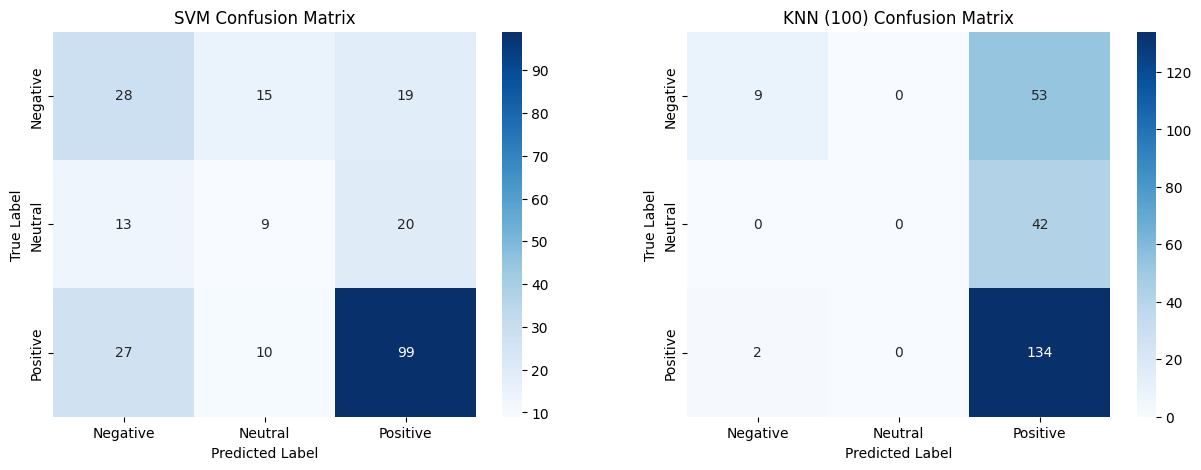

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class labels to ensure correct ordering
class_labels = ["Negative", "Neutral", "Positive"]

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)  # Compute confusion matrix
    df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)  # Convert to DataFrame

    # Plot heatmap
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# Generate confusion matrices
plot_confusion_matrix(merge_df["Sentiment Label"], y_pred, "SVM Confusion Matrix", axes[0])
plot_confusion_matrix(merge_df["Sentiment Label"], y_pred_rf, "KNN (100) Confusion Matrix", axes[1])

# Display plots
plt.show()


In [83]:
print(merge_df["Sentiment Label"].value_counts())


Sentiment Label
Positive    136
Negative     62
Neutral      42
Name: count, dtype: int64
